In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ANLP-Y4T3/email_spam.csv")
data.head(5)

,email,label
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam


In [ ]:
#checking distribution of the dataset
data.groupby('label').count()

,email
label,
ham,8336
spam,9494


In [ ]:
#naming columns
data.columns = ['text', 'label']
# creating dummy variables for spam and ham
y=pd.get_dummies(data['label'])
y=y.iloc[:,1].values
data.head(5)

,text,label
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam


In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stopwords = nltk.corpus.stopwords.words('english')
import re

#cleaning dataset
tk = TweetTokenizer() #creating object for tokenizer
stemmer = SnowballStemmer('english') #creating object for stemmer
corpus = []

for i in range(0,len(data)): #len(data) indicates no. of rows or lines to process
 message = re.sub('[^a-zA-Z]', ' ', data['text'][i]) #replace any value other than a-z or A-Z with space
 message = re.sub("Subject", "", message)
 message = message.lower() #lowercase all words in a row
 message =tk.tokenize(message)
 message = [stemmer.stem(word) for word in message if not\
 word in set(stopwords)] #stemming if word not present in stop words
 message = ' '.join(message) #joining list of words to form a sentence
 corpus.append(message)

In [ ]:
#creating cleaned dataframe containing text and labels for visualisation purpose
df = pd.DataFrame({'text':corpus})
print (df)

                                                    text
0      cam babe look look companion friendship love d...
1      want make money order confirm order ship janua...
2           food thought join take free tour click remov
3      pharmaci ta would want cheap perscript http ww...
4      bigger breast pill imag load cli k info ship s...
...                                                  ...
17825  consent need desk honor chairman local everyth...
17826  see page save thousand e help get e cheap zv s...
17827  go time aaron offload misplac shove withstand ...
17828  extra time ejacul within minut penetr must ord...
17829  one time check rock money paper space winter u...

[17830 rows x 1 columns]


In [ ]:
data= df.join(data["label"], how="outer")
print(data)

                                                    text label
0      cam babe look look companion friendship love d...  spam
1      want make money order confirm order ship janua...  spam
2           food thought join take free tour click remov  spam
3      pharmaci ta would want cheap perscript http ww...  spam
4      bigger breast pill imag load cli k info ship s...  spam
...                                                  ...   ...
17825  consent need desk honor chairman local everyth...  spam
17826  see page save thousand e help get e cheap zv s...  spam
17827  go time aaron offload misplac shove withstand ...  spam
17828  extra time ejacul within minut penetr must ord...  spam
17829  one time check rock money paper space winter u...  spam

[17830 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size = 0.20,random_state = 0)

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
BOW_train=cv.fit_transform(X_train).toarray() #fitting only on the train set
BOW_test=cv.transform(X_test).toarray()

In [ ]:
print(len(cv.vocabulary_))
print(BOW_train.shape)
print(BOW_test.shape)
print(BOW_train[:1000])

48091
(14264, 48091)
(3566, 48091)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




#Models trained with BOW

In [ ]:
#import the classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
classifier_MNB = MultinomialNB()
classifier_MNB.fit(BOW_train, y_train)
# Test the model after training
test_results_MNB = classifier_MNB.predict(BOW_test)
accuracy = metrics.accuracy_score(y_test, test_results_MNB)
print(f'{accuracy *100: .2f}%')

 98.46%


##knn model train

In [ ]:
classifier_KNN = KNeighborsClassifier()
classifier_KNN.fit(BOW_train, y_train)
# Test the model after training
test_results_KNN = classifier_KNN.predict(BOW_test)
accuracy = metrics.accuracy_score(y_test, test_results_KNN)
print(f'{accuracy *100: .2f}%')

 85.19%


##random forest train

In [ ]:
classifier_RF = RandomForestClassifier(max_depth=60,n_estimators=100,n_jobs=-1,
random_state=2)
classifier_RF.fit(BOW_train, y_train)
# Test the model after training
test_results_RF = classifier_RF.predict(BOW_test)
accuracy = metrics.accuracy_score(y_test, test_results_RF)
print(f'{accuracy *100: .2f}%')

 96.80%


#Models trained with tfid vectors

In [ ]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
TFIDF_train=tfidf.fit_transform(X_train).toarray() #fitting only on the train
set
TFIDF_test=tfidf.transform(X_test).toarray()
print(len(tfidf.vocabulary_))
print(TFIDF_train.shape)
print(TFIDF_test.shape)

48091
(14264, 48091)
(3566, 48091)


In [ ]:
classifier_MNB.fit(TFIDF_train, y_train)
# Test the model after training
test_results_MNB = classifier_MNB.predict(TFIDF_test)
accuracy = metrics.accuracy_score(y_test, test_results_MNB)
print(f'{accuracy *100: .2f}%')

 98.40%


In [ ]:
classifier_KNN.fit(TFIDF_train, y_train)
# Test the model after training
test_results_KNN = classifier_KNN.predict(TFIDF_test)
accuracy = metrics.accuracy_score(y_test, test_results_KNN)
print(f'{accuracy *100: .2f}%')

 68.56%


In [ ]:
classifier_RF.fit(TFIDF_train, y_train)
# Test the model after training
test_results_RF = classifier_RF.predict(TFIDF_test)
accuracy = metrics.accuracy_score(y_test, test_results_RF)
print(f'{accuracy *100: .2f}%')

 97.14%


#Table for Comparison of Methods

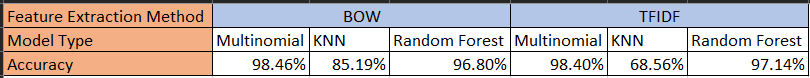



Best performance is with BOW and Multinomial